In [1]:
pip install tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

# be sure to change the file path
# if you have the dataset in another
# directly than the working folder
df = pd.read_csv('winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:

import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [4]:

# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range

In [5]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1],]

input_shape

[11]

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=input_shape)
])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-08 13:22:55.930395: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-08 13:22:55.930594: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-08 13:22:55.930605: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1757317975.931568  676882 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1757317975.932117  676882 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/devic

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:

#The input_shape needs to be passed to the first Dense layer as a tuple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                        input_shape=(input_shape)), # Pass input_shape as a tuple
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae')

In [9]:

losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )

Epoch 1/15


2025-09-08 13:23:01.572411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.3726 - val_loss: 0.1507
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1799 - val_loss: 0.1894
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1721 - val_loss: 0.1277
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1316 - val_loss: 0.1433
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1390 - val_loss: 0.1182
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1185 - val_loss: 0.1224
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1237 - val_loss: 0.1140
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1175 - val_loss: 0.1167
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1163 - val_loss: 0.1115
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1134 - val_loss: 0.1110
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1139 - val_loss: 0.1100
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1118 - val_loss: 0.1093
Epoch 13/15

In [10]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


array([[0.42177245],
       [0.5513568 ],
       [0.4452718 ]], dtype=float32)

In [11]:

y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

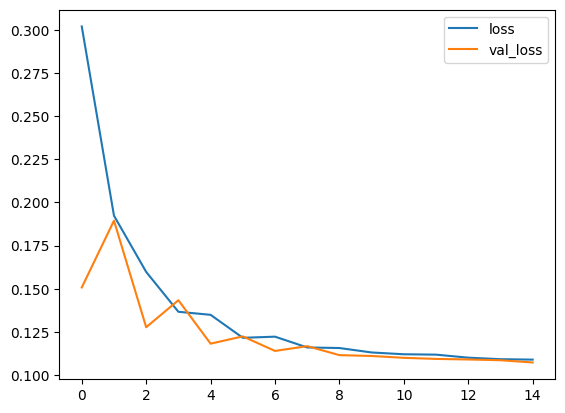

In [12]:

loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()